In [34]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#!pip install scikit-learn

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import euclidean
from itertools import product
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
from scipy.spatial import distance
from tqdm import tqdm

In [65]:
df = pd.read_csv('final_df_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616380 entries, 0 to 1616379
Data columns (total 16 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Unnamed: 0                               1616380 non-null  int64  
 1   Time                                     1616380 non-null  object 
 2   Engine_Coolant_Temperature_degreesC      905194 non-null   float64
 3   Intake_Manifold_Absolute_Pressure_kPa    1616380 non-null  float64
 4   Engine_RPM_RPM                           1616380 non-null  float64
 5   Vehicle_Speed_Sensor_km_h                1616380 non-null  float64
 6   Intake_Air_Temperature_degreesC          905194 non-null   float64
 7   Air_Flow_Rate_from_Mass_Flow_Sensor_g_s  1616380 non-null  float64
 8   Absolute_Throttle_Position_              1616346 non-null  float64
 9   Ambient_Air_Temperature_degreesC         905156 non-null   float64
 10  Accelerator_Pedal_

In [69]:
#Taking different df's
label_col = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'
df1 = df[(df['label'] == 'fleet1')]
df2 = df[(df['label'] == 'fleet2')]
df3 = df[(df['label'] == 'fleet3')]
df4 = df[(df['label'] == 'fleet4')]

  0%|          | 0/222508 [00:00<?, ?it/s]

100%|██████████| 222508/222508 [00:01<00:00, 151021.74it/s]


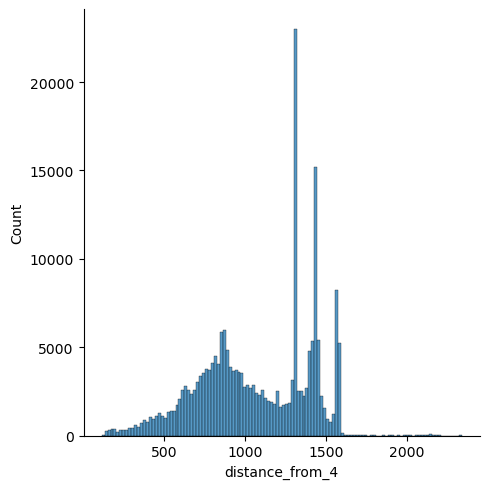

In [36]:
#Creation of predition for df2
columns_to_exclude = ['Absolute_Throttle_Position_', 'Accelerator_Pedal_Position_D_', 'Accelerator_Pedal_Position_E_', 'Unnamed: 0', 'Time', 'label','Air_Flow_Rate_from_Mass_Flow_Sensor_g_s']

vals_for_sim = pd.DataFrame(df1.drop(columns_to_exclude , axis = 1).mean()).T

def euclidean_distance(row1, row2):
    return distance.euclidean(row1, row2)

distances = [euclidean_distance(vals_for_sim.values[0], row) for row in tqdm(df2.drop(columns_to_exclude , axis = 1).fillna(0).values)]

df2["distance_from_1"] = distances

sns.displot(df2.distance_from_1)

df_to_save = df2[df2.distance_from_1 < 250].sort_values('distance_from_4')[:500]

cols_to_update = ['Engine_Coolant_Temperature_degreesC',
       'Intake_Manifold_Absolute_Pressure_kPa', 'Engine_RPM_RPM',
       'Vehicle_Speed_Sensor_km_h', 'Intake_Air_Temperature_degreesC',
       'Ambient_Air_Temperature_degreesC',
       'Engine_Coolant_Temperature_A_degreesC',
       'Intake_Air_Temperature_A_degreesC',
       'Ambient_Air_Temperature_A_degreesC']

for col in cols_to_update:
    df_to_save[col] = [vals_for_sim[col][0]]*len(df_to_save)

df_to_save

In [62]:
vals_for_sim.columns

Index(['Engine_Coolant_Temperature_degreesC',
       'Intake_Manifold_Absolute_Pressure_kPa', 'Engine_RPM_RPM',
       'Vehicle_Speed_Sensor_km_h', 'Intake_Air_Temperature_degreesC',
       'Ambient_Air_Temperature_degreesC',
       'Engine_Coolant_Temperature_A_degreesC',
       'Intake_Air_Temperature_A_degreesC',
       'Ambient_Air_Temperature_A_degreesC'],
      dtype='object')

In [75]:
cols_to_update = ['Engine_Coolant_Temperature_degreesC',
       'Intake_Manifold_Absolute_Pressure_kPa', 'Engine_RPM_RPM',
       'Vehicle_Speed_Sensor_km_h', 'Intake_Air_Temperature_degreesC',
       'Ambient_Air_Temperature_degreesC',
       'Engine_Coolant_Temperature_A_degreesC',
       'Intake_Air_Temperature_A_degreesC',
       'Ambient_Air_Temperature_A_degreesC']

columns_to_exclude = ['Absolute_Throttle_Position_', 'Accelerator_Pedal_Position_D_', 
                      'Accelerator_Pedal_Position_E_', 'Unnamed: 0', 'Time', 'label','Air_Flow_Rate_from_Mass_Flow_Sensor_g_s']

label_col = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'
df1 = df[(df['label'] == 'fleet1')]
df2 = df[(df['label'] == 'fleet2')]
df3 = df[(df['label'] == 'fleet3')]
df4 = df[(df['label'] == 'fleet4')]

def calculate_distances(df1, df2, columns_to_exclude, cols_to_update):
    # Create vals_for_sim DataFrame
    vals_for_sim = pd.DataFrame(df1.drop(columns_to_exclude, axis=1).mean()).T

    def euclidean_distance(row1, row2):
        return distance.euclidean(row1, row2)

    distances = [euclidean_distance(vals_for_sim.values[0], row) for row in tqdm(df2.drop(columns_to_exclude, axis=1).fillna(0).values)]

    df2["distance_from_1"] = distances

    sns.displot(df2.distance_from_1)

    df_to_save = df2[df2.distance_from_1 < 250].sort_values('distance_from_1')[:500]

    for col in cols_to_update:
        df_to_save[col] = [vals_for_sim[col][0]] * len(df_to_save)

    return df_to_save

#calculate_distances(df1 , df2 , columns_to_exclude , cols_to_update).to_csv("Fleet_prediction_data_fleet_2.csv" , header = True)




















100%|██████████| 222508/222508 [00:01<00:00, 114707.02it/s]


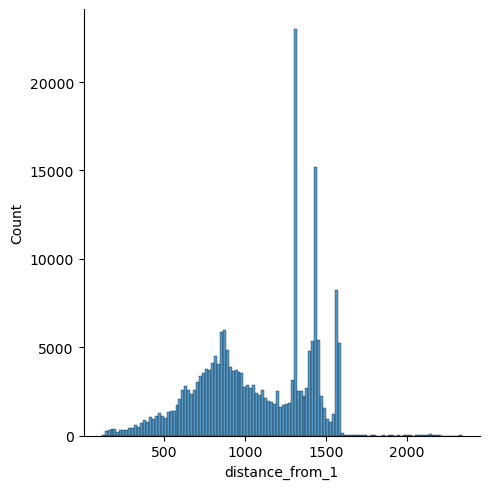

In [76]:
label_col = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'
df1 = df[(df['label'] == 'fleet1')]
df2 = df[(df['label'] == 'fleet2')]
df3 = df[(df['label'] == 'fleet3')]
df4 = df[(df['label'] == 'fleet4')]
calculate_distances(df1 , df2 , columns_to_exclude , cols_to_update).to_csv("Fleet_prediction_data_fleet_2.csv" , header = True)









































































































100%|██████████| 1217200/1217200 [00:10<00:00, 112183.76it/s]


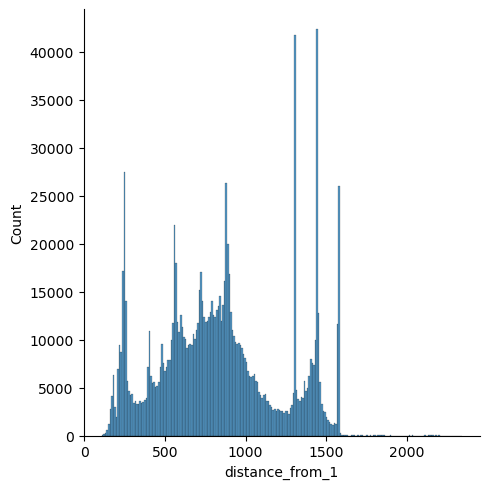

In [79]:
label_col = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'
df1 = df[(df['label'] == 'fleet1')]
df2 = df[(df['label'] == 'fleet2')]
df3 = df[(df['label'] == 'fleet3')]
df4 = df[(df['label'] == 'fleet4')]
calculate_distances(df1 , df3 , columns_to_exclude , cols_to_update).to_csv("Fleet_prediction_data_fleet_3.csv" , header = True)






100%|██████████| 54640/54640 [00:00<00:00, 124216.13it/s]


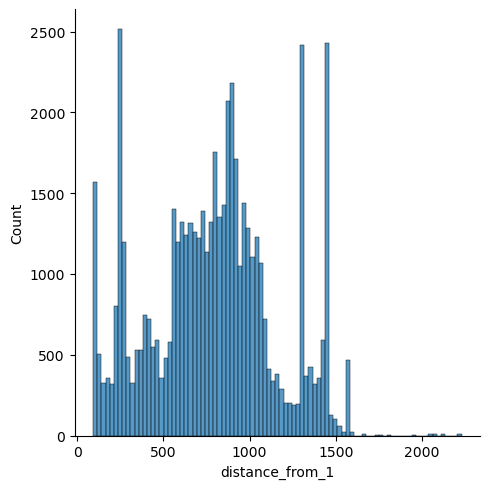

In [80]:
label_col = 'Air_Flow_Rate_from_Mass_Flow_Sensor_g_s'
df1 = df[(df['label'] == 'fleet1')]
df2 = df[(df['label'] == 'fleet2')]
df3 = df[(df['label'] == 'fleet3')]
df4 = df[(df['label'] == 'fleet4')]
calculate_distances(df1 , df4 , columns_to_exclude , cols_to_update).to_csv("Fleet_prediction_data_fleet_4.csv" , header = True)